# mnist_show

In [13]:

import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist#閱讀MNIST數據集
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    #Creates an image memory from an object exporting the array interface
    #Base class for numpy scalar types.
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形狀已經更改為原始圖像大小
print(img.shape)  # (28, 28)

img_show(img)

# ?Image.fromarray
# ?np.uint8
# ?Image
# ?load_mnist

img[0]#array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       #0, 0, 0, 0, 0], dtype=uint8)

5
(784,)
(28, 28)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=uint8)

# neuralnet_mnist

In [ ]:
s

In [14]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 在根目錄導入文件的設置
import numpy as np 
import pickle #Create portable serialized representations of Python objects.
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

In [20]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f: #"with" ensure close the resource after use it 
        network = pickle.load(f)#Read and return an object from the pickle data stored in a file.
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1 #XW+b
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [21]:
x, t = get_data()#input and output of testing data
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 獲得最可能元素的索引 !!!!
    if p == t[i]: # coherent with testing data
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) # str(float()) is python2寫法

Accuracy:0.9352


In [28]:
y=predict(network,x[0])
y,np.argmax(y)

(array([  8.44124879e-05,   2.63506308e-06,   7.15494214e-04,
          1.25862623e-03,   1.17279535e-06,   4.49908075e-05,
          1.62693183e-08,   9.97065008e-01,   9.37447930e-06,
          8.18311586e-04], dtype=float32), 7)

# neural_net_batch

In [29]:
batch_size = 100 # number of batch
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    #axis : int, optional
    #     By default, the index is into the flattened array, otherwise
    #     along the specified axis.
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [35]:
x_batch_0 = x[0:batch_size]
np.size(x[0]),np.size(x_batch_0) #784,78400

(784, 78400)

# Relu

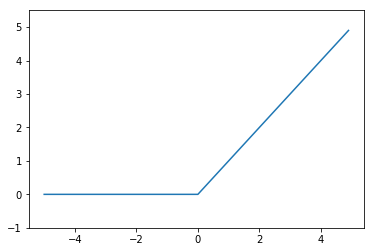

In [38]:
import matplotlib.pylab as plt
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()